In [8]:
import pandas as pd
import os
import re
import glob

# 读取所有CSV文件
uploaded_files = glob.glob("../raw data/*.csv")
all_data = []

for file_path in uploaded_files:
    try:
        file_name = os.path.basename(file_path)
        name_match = re.match(r'[^_]+_([^_]+)_.*', file_name)
        tester_name = name_match.group(1) if name_match else "Unknown"

        with open(file_path, 'r', encoding='utf-8') as f:
            lines = f.readlines()

        if len(lines) >= 2:
            try:
                env_path = lines[1].strip().split(',')[-1].replace("\\", "/")
                second_line = env_path.split('/')[-1].split('.')[0]
                environment_name = second_line if second_line else "Unknown"
            except Exception as e:
                print(f"环境名解析失败: {file_name}, 错误: {e}")
                environment_name = "Unknown"
        else:
            environment_name = "Unknown"

        for line in lines:
            parts = line.strip().split(',')
            if len(parts) >= 6:
                question_code = parts[-2]
                score = parts[-1]
                if re.match(r'^(EQ|T|CL)\d+$', question_code):
                    try:
                        score_int = int(score)
                    except ValueError:
                        print(f"分数解析失败: {file_name}, 行: {line}")
                        continue
                    all_data.append({
                        'Tester': tester_name,
                        'Environment': environment_name,
                        'QuestionCode': question_code,
                        'Score': score_int
                    })
    except Exception as e:
        print(f"文件处理失败: {file_path}, 错误: {e}")

df = pd.DataFrame(all_data)
df

,Tester,Environment,QuestionCode,Score
0,so,vocalexplanation,EQ1,7
1,so,vocalexplanation,EQ2,3
2,so,vocalexplanation,EQ3,7
3,so,vocalexplanation,T1,4
4,so,vocalexplanation,T2,2
...,...,...,...,...
382,so,noexplanation,T2,1
383,so,noexplanation,T3,2
384,so,noexplanation,CL1,3
385,so,noexplanation,CL2,1


In [9]:
# Reverse the scores for CL1 and CL3 (10 - score)
df['Score'] = df.apply(
    lambda row: 10 - row['Score'] if row['QuestionCode'] in ['CL1', 'CL3'] else row['Score'],
    axis=1
)
df

# 导出为 txt 文件（以 tab 分隔）
df.to_csv('questionaire_result.txt', sep='\t', index=False, encoding='utf-8')

## Average Score per Tester

In [10]:
# 平均得分统计
avg_scores = df.groupby(['Tester', 'Environment'])['Score'].mean().reset_index()
avg_scores.rename(columns={'Score': 'AverageScore'}, inplace=True)
avg_scores

,Tester,Environment,AverageScore
0,Alain,noexplanation,5.666667
1,Alain,visualexplanation,6.888889
2,Alain,vocalexplanation,6.666667
3,Alain,vvexplanation,5.222222
4,Jan,noexplanation,5.111111
5,Jan,visualexplanation,4.555556
6,Jan,vocalexplanation,5.111111
7,Jan,vvexplanation,5.555556
8,ann,noexplanation,5.444444
9,ann,visualexplanation,3.888889


## Everage Score per Type（EQ/T/CL）

In [11]:
# 统计每个测试环境中，各题目的平均得分（不区分测试者）
df['QuestionType'] = df['QuestionCode'].str.extract(r'^(EQ|T|CL)')
env_question_avg = df.groupby(['Environment', 'QuestionCode'])['Score'].mean().reset_index()
env_question_avg.rename(columns={'Score': 'AverageScore'}, inplace=True)

env_question_avg

,Environment,QuestionCode,AverageScore
0,noexplanation,CL1,3.900000
1,noexplanation,CL2,4.500000
2,noexplanation,CL3,3.500000
3,noexplanation,EQ1,7.000000
4,noexplanation,EQ2,5.900000
5,noexplanation,EQ3,5.800000
6,noexplanation,T1,5.300000
7,noexplanation,T2,5.000000
8,noexplanation,T3,4.900000
9,visualexplanation,CL1,4.363636


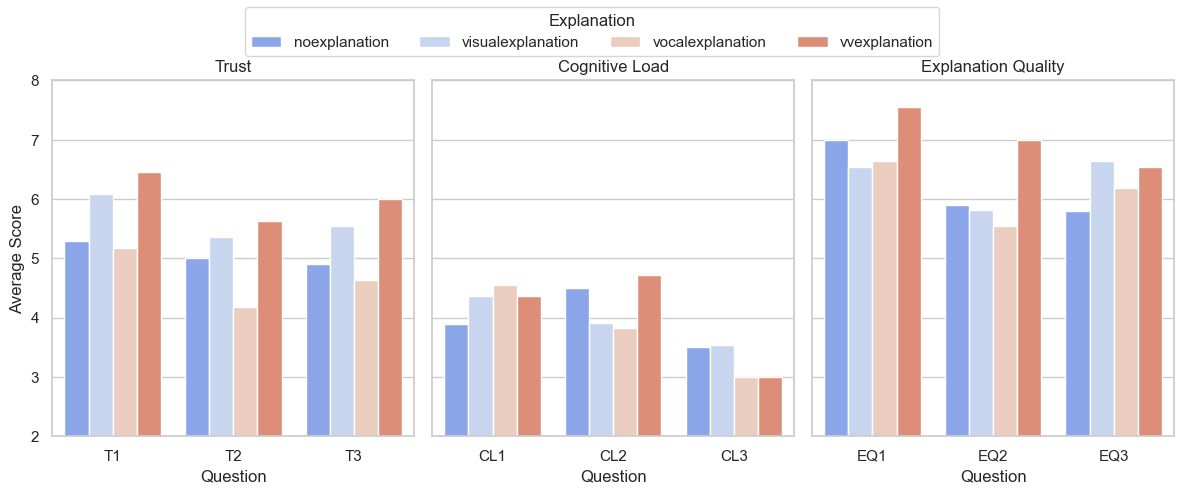

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 分类函数（确保有这一列）
def classify_code(code):
    if code.startswith('T'):
        return 'Trust'
    elif code.startswith('CL'):
        return 'Cognitive Load'
    elif code.startswith('EQ'):
        return 'Explanation Quality'
    else:
        return 'Other'

# 添加分类列
env_question_avg['Category'] = env_question_avg['QuestionCode'].apply(classify_code)

# 分别取出各类别数据
trust_df = env_question_avg[env_question_avg['Category'] == 'Trust']
cl_df = env_question_avg[env_question_avg['Category'] == 'Cognitive Load']
eq_df = env_question_avg[env_question_avg['Category'] == 'Explanation Quality']

# 设置配色风格
sns.set(style="whitegrid")
custom_palette = sns.color_palette("coolwarm", n_colors=4)

# 创建 1行3列子图，不共享 x/y 轴
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True)  

# 第一张图：Trust
sns.barplot(
    ax=axes[0],
    x='QuestionCode',
    y='AverageScore',
    hue='Environment',
    data=trust_df,
    palette=custom_palette,
    order=trust_df['QuestionCode'].unique()
)
axes[0].set_title('Trust')
axes[0].set_xlabel('Question')
axes[0].set_ylabel('Average Score')

# 第二张图：Cognitive Load
sns.barplot(
    ax=axes[1],
    x='QuestionCode',
    y='AverageScore',
    hue='Environment',
    data=cl_df,
    palette=custom_palette,
    order=cl_df['QuestionCode'].unique()
)
axes[1].set_title('Cognitive Load')
axes[1].set_xlabel('Question')
axes[1].set_ylabel('')

# 第三张图：Explanation Quality
sns.barplot(
    ax=axes[2],
    x='QuestionCode',
    y='AverageScore',
    hue='Environment',
    data=eq_df,
    palette=custom_palette,
    order=eq_df['QuestionCode'].unique()
)
axes[2].set_title('Explanation Quality')
axes[2].set_xlabel('Question')
axes[2].set_ylabel('')

# 移除单图图例，统一放在顶部
for ax in axes:
    ax.get_legend().remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Explanation', loc='upper center', ncol=len(labels))

# 设置统一 y 轴范围
for ax in axes:
    ax.set_ylim(2, 8)

# 布局调整
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


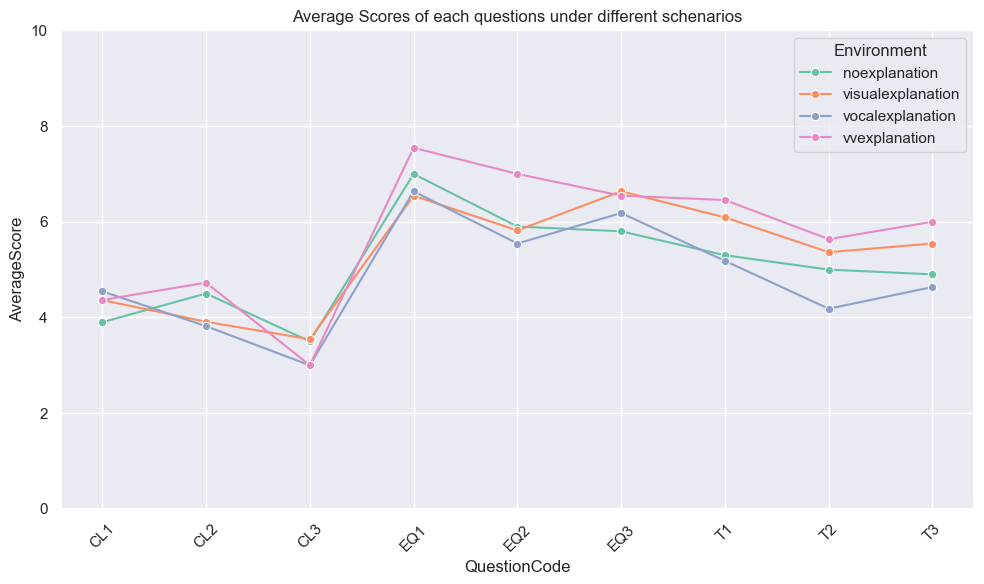

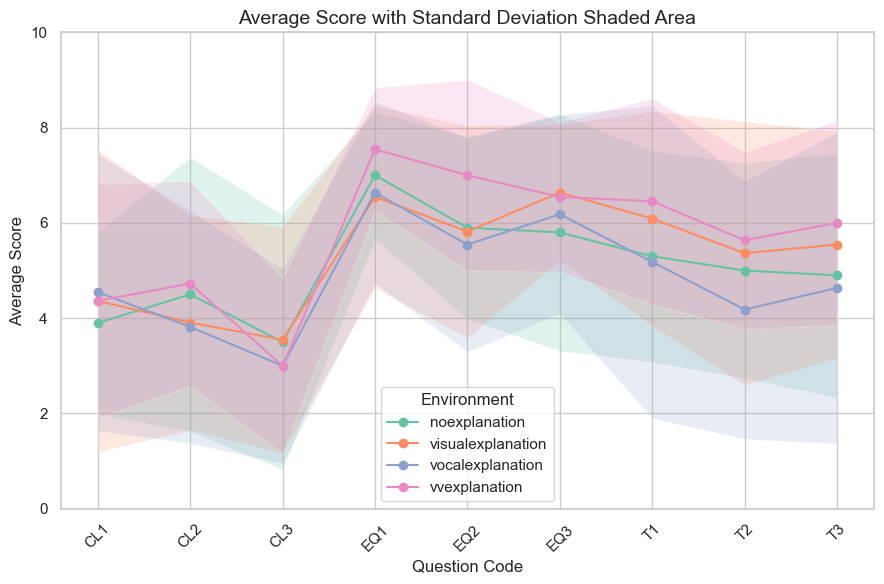

In [15]:
env_question_stats = df.groupby(['Environment', 'QuestionCode'])['Score'].agg(['mean', 'std']).reset_index()
env_question_stats.rename(columns={'mean': 'AverageScore', 'std': 'StdDev'}, inplace=True)

# 排序函数增加 try-except，防止个别值出错导致整个排序失败
def sort_key(x):
    try:
        return (x[:2], int(x[2:]))
    except Exception:
        return (x[:2], 999)  # 将无法转换的排到最后
sns.set(style="darkgrid", palette="Set2")
# 执行排序并绘图
ordered_questions = sorted(env_question_avg['QuestionCode'].unique(), key=sort_key)
env_question_avg['QuestionCode'] = pd.Categorical(env_question_avg['QuestionCode'],
                                                  categories=ordered_questions, ordered=True)

plt.figure(figsize=(10, 6))
sns.lineplot(data=env_question_avg, x='QuestionCode', y='AverageScore', hue='Environment', marker='o')
plt.title("Average Scores of each questions under different schenarios")
plt.xticks(rotation=45)
plt.ylim(0, 10)
plt.tight_layout()
plt.show()


sns.set_style("whitegrid")
sns.set_palette("Set2")  # 柔和易辨识
# 检查是否有缺失或非法的 std 数据（例如全部为 NaN）
env_question_stats_clean = env_question_stats.dropna(subset=['AverageScore', 'StdDev'])

plt.figure(figsize=(9, 6))

# 画每条线 + 标准差色块
for env in env_question_stats_clean['Environment'].unique():
    sub = env_question_stats_clean[env_question_stats_clean['Environment'] == env].sort_values("QuestionCode")

    x = sub['QuestionCode']
    y = sub['AverageScore']
    yerr = sub['StdDev']

    # 主折线
    plt.plot(x, y, label=env, marker='o')

    # 阴影色块（±1 标准差）
    plt.fill_between(x, y - yerr, y + yerr, alpha=0.2)

plt.title("Average Score with Standard Deviation Shaded Area", fontsize=14)
plt.xlabel("Question Code")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.ylim(0, 10)
plt.tight_layout()
plt.legend(title="Environment")
plt.show()



QuestionCode,CL1,CL2,CL3,EQ1,EQ2,EQ3,T1,T2,T3
QuestionCode,,,,,,,,,
CL1,1.000000,-0.537514,-0.632244,-0.227285,-0.033393,0.657970,0.210505,-0.259997,0.110372
CL2,-0.537514,1.000000,-0.121729,0.940880,0.835080,-0.141303,0.430201,0.635088,0.528428
CL3,-0.632244,-0.121729,1.000000,-0.429154,-0.375112,-0.164709,-0.082664,0.263082,-0.062802
EQ1,-0.227285,0.940880,-0.429154,1.000000,0.929920,0.041354,0.522215,0.571515,0.598113
EQ2,-0.033393,0.835080,-0.375112,0.929920,1.000000,0.395737,0.797270,0.765441,0.845113
EQ3,0.657970,-0.141303,-0.164709,0.041354,0.395737,1.000000,0.822530,0.520757,0.750981
T1,0.210505,0.430201,-0.082664,0.522215,0.797270,0.822530,1.000000,0.887206,0.993245
T2,-0.259997,0.635088,0.263082,0.571515,0.765441,0.520757,0.887206,1.000000,0.923733
T3,0.110372,0.528428,-0.062802,0.598113,0.845113,0.750981,0.993245,0.923733,1.000000


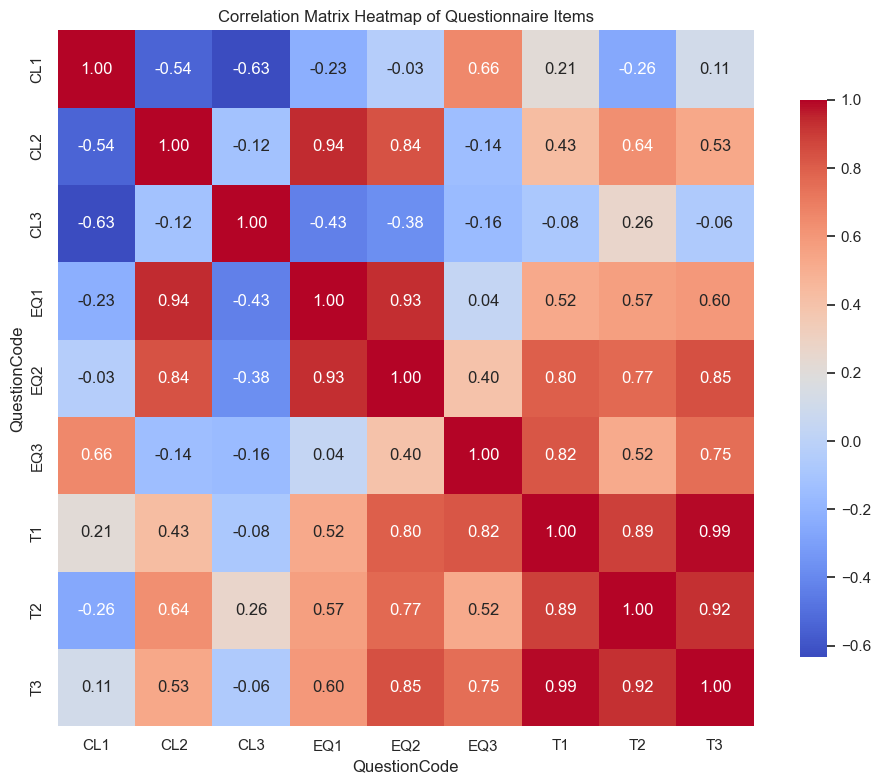

In [44]:
# 将 env_question_avg 转为 wide-form
env_question_pivot = env_question_avg.pivot(index='Environment', columns='QuestionCode', values='AverageScore').reset_index()

# 如果需要 dict 格式
data = env_question_pivot.to_dict(orient='list')

# 计算相关矩阵（对 DataFrame 而不是 dict）
correlation_matrix = env_question_pivot.drop('Environment', axis=1).corr()


# 直接显示相关矩阵
from IPython.display import display
display(correlation_matrix)

# Also return a simplified descriptive summary text
summary = """
Explanation types influenced user ratings across all categories. The visual+vocal condition scored highest in trust and explanation quality, with moderate cognitive load. Vocal-only explanations increased mental effort while reducing clarity and trust. Correlation analysis helps explore how these dimensions relate across conditions.
"""
summary.strip()


# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})

# Set title
plt.title("Correlation Matrix Heatmap of Questionnaire Items")

# Show plot
plt.tight_layout()
plt.show()
